In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [66]:
#import Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #For LDA
from sklearn.naive_bayes import GaussianNB as NB #For Naive Bayes--> Classifier
from sklearn.linear_model import LogisticRegression as LR #For Logistic Regression
from sklearn.neighbors import KNeighborsClassifier as KNN #For KNN

#DATA set and analysis

In [67]:
dataset=pd.read_csv('Default.csv')
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [68]:
#Data preprocessing
dataset.isnull().sum()#check for null vals


default    0
student    0
balance    0
income     0
dtype: int64

In [69]:
dataset.student.unique() #returns all unique values or lavels

array(['No', 'Yes'], dtype=object)

In [70]:
#convert student labels to numbers
dataset['student'].replace(to_replace=['No','Yes'],value=[0,1],inplace=True)
dataset.head()

,default,student,balance,income
0,No,0,729.526495,44361.625074
1,No,1,817.180407,12106.134700
2,No,0,1073.549164,31767.138947
3,No,0,529.250605,35704.493935
4,No,0,785.655883,38463.495879


In [71]:
#conver default labels to numbers
dataset['default'].replace(to_replace=['No','Yes'],value=[0,1],inplace=True)
dataset.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


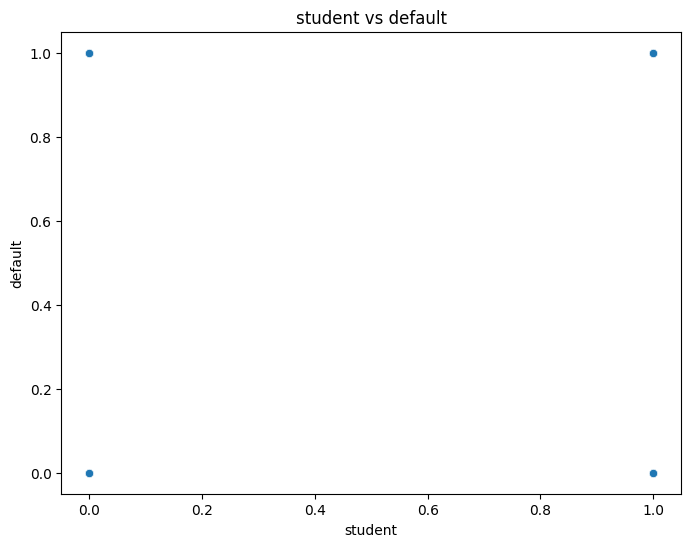

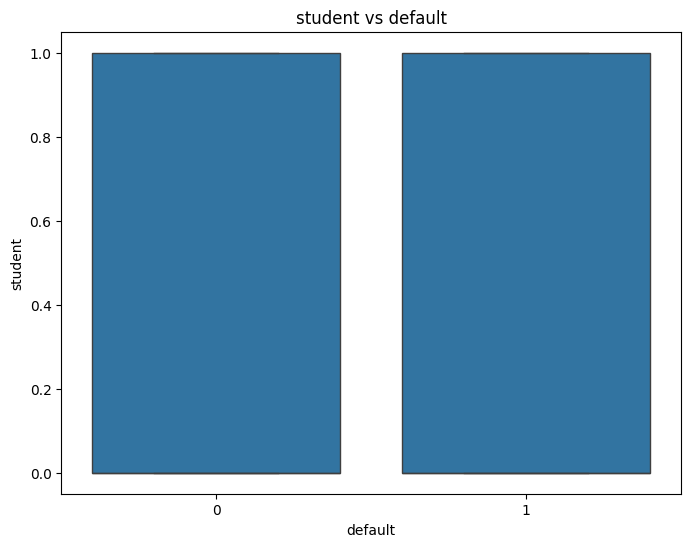

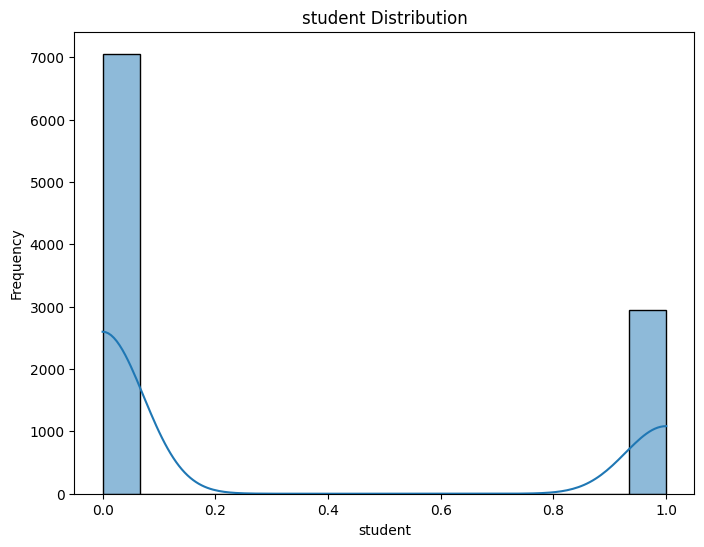

Correlation between student and default: 0.03542047403799173


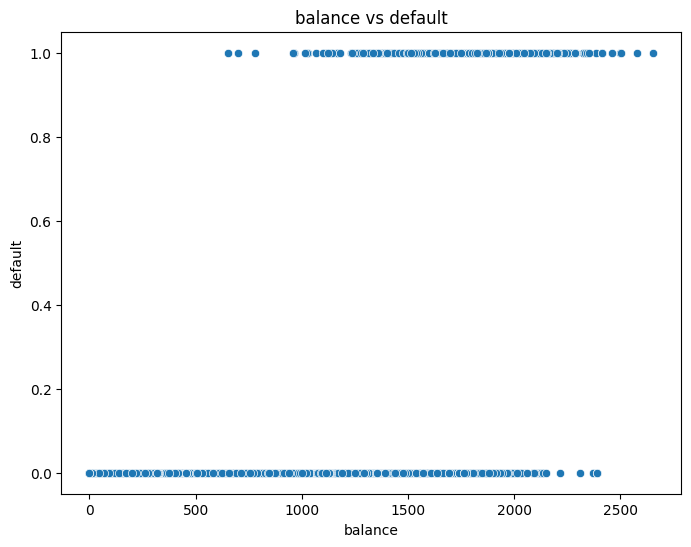

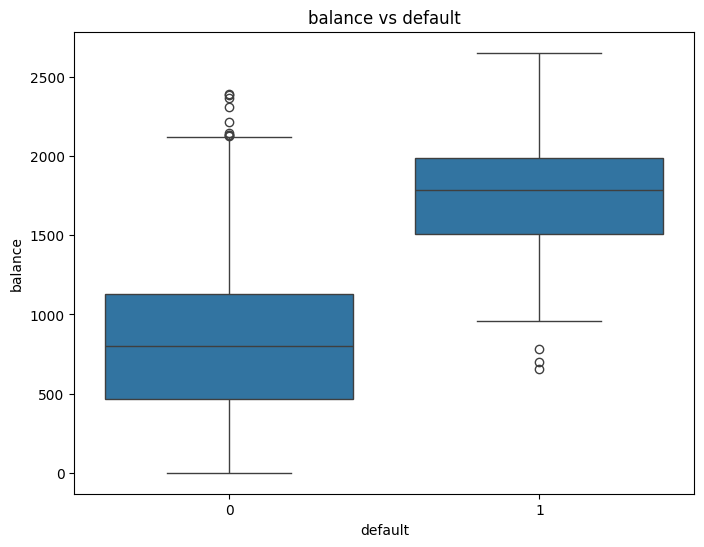

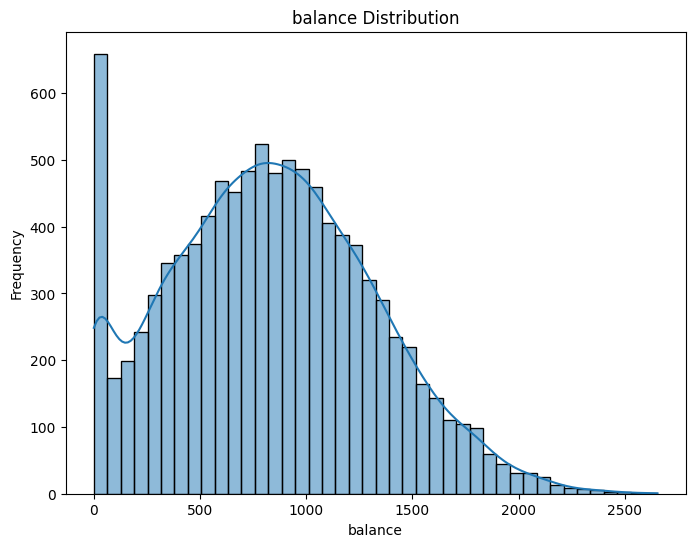

Correlation between balance and default: 0.3501192470416942


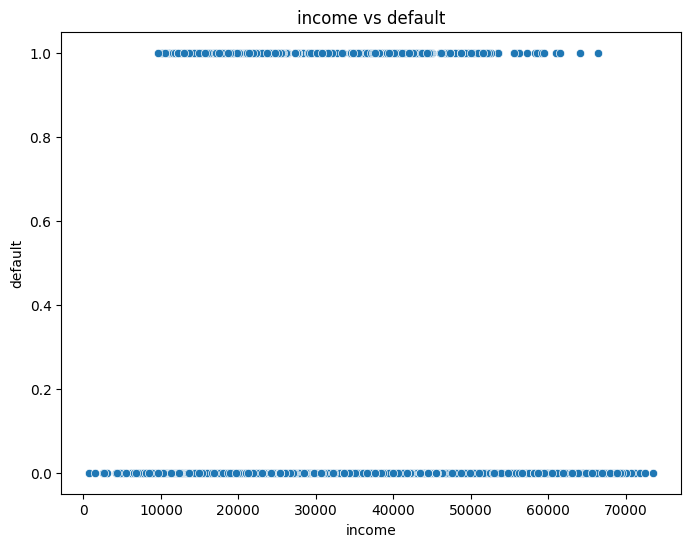

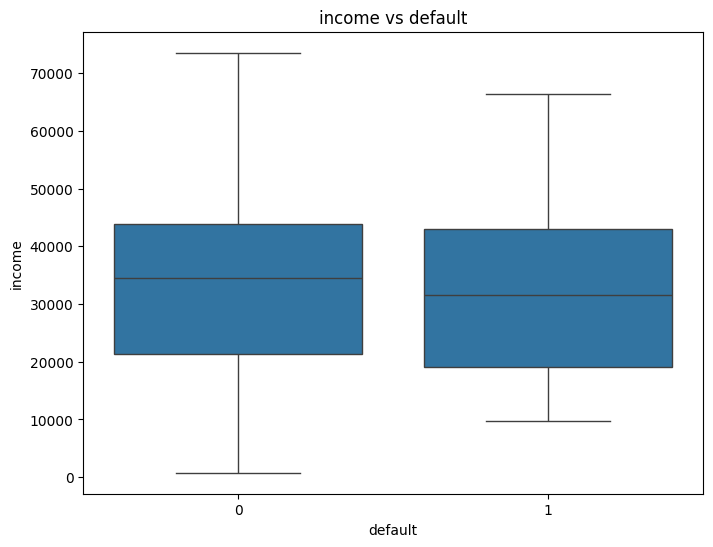

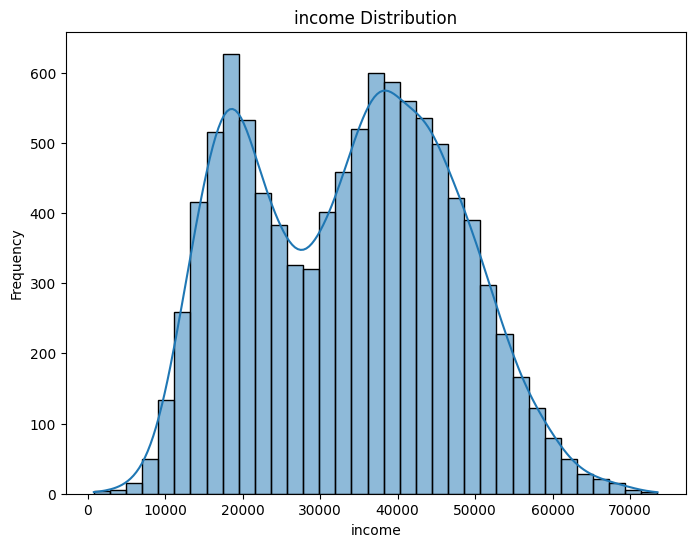

Correlation between income and default: -0.019871447656794293


In [72]:
def analyze_column(data, column, target_column):
    """Analyze a single column against the target."""
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y=target_column)
    plt.title(f'{column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=target_column, y=column)
    plt.title(f'{column} vs {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(column)
    plt.show()

    # # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Correlation
    correlation = data[[column, target_column]].corr().iloc[0, 1]
    print(f'Correlation between {column} and {target_column}: {correlation}')

def analyze_all_columns(data, target_column): #"""Analyze all columns against the target."""
    feature_columns = [col for col in data.columns if col != target_column]
    for column in feature_columns:
      analyze_column(data, column, target_column)

analyze_all_columns(dataset, 'default')

In [73]:
X= dataset.drop('default',axis=1)
y=dataset.default
X.head()


,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [75]:
#split data into training and testing
train_test_split(X,y,test_size=1,random_state=42) #data used, target data, size, traiing data


[      student      balance        income
 4684        0   771.789347  42139.070269
 1731        0     0.000000  21809.218509
 4742        0   113.571264  32803.832648
 4521        0  1358.132472  49903.597081
 6340        0  1302.553499  32235.052450
 ...       ...          ...           ...
 5734        0   865.697004  33541.046380
 5191        1   493.629546  20500.212632
 5390        0   722.029162  26984.256287
 860         1   163.939823  21083.004510
 7270        0   637.338107  49657.394282
 
 [9999 rows x 3 columns],
       student      balance        income
 6252        0  1435.662933  31507.089277,
 4684    0
 1731    0
 4742    0
 4521    0
 6340    0
        ..
 5734    0
 5191    0
 5390    0
 860     0
 7270    0
 Name: default, Length: 9999, dtype: int64,
 6252    0
 Name: default, dtype: int64]

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)
print(X_train.shape) #(num_samples, num_features)
print(X_test.shape)
print(y_train.shape)# (Must match X)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


#Logistic regression


In [77]:
#add Constants to Training and testing data for logistic regression
X_train_lr=sm.add_constant(X_train)
X_test_lr=sm.add_constant(X_test)
X_train_lr.head()

,const,student,balance,income
8247,1.0,0,707.436149,42407.754230
705,1.0,0,540.279045,26267.156350
4451,1.0,0,257.546332,29967.204283
4328,1.0,0,355.170176,30440.895193
3882,1.0,0,407.289756,45376.235907


In [78]:
lr_model= sm.Logit(y_train,X_train_lr).fit() #creates model and trains it usint .fit()
print(lr_model.summary()) #summary of model

Optimization terminated successfully.
         Current function value: 0.080731
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.4481
Time:                        16:46:46   Log-Likelihood:                -645.85
converged:                       True   LL-Null:                       -1170.3
Covariance Type:            nonrobust   LLR p-value:                4.519e-227
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2663      0.534    -19.237      0.000     -11.312      -9.220
student       -0.7837      0

In [79]:
y_hat=lr_model.predict(X_test_lr) #predicts defaults in lr.model
y_hat


739     0.005985
9426    0.051231
8200    0.000041
5880    0.005859
9114    0.009893
          ...   
1331    0.000049
3820    0.000026
2866    0.008317
3108    0.001743
4476    0.000117
Length: 2000, dtype: float64

In [80]:
#get the final prediction based of the probabilities, >0.5
y_hat= [1 if i>0.5 else 0 for i in y_hat]
y_hat[:10  ]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [81]:
#check accuracy
accuracy_score(y_test,y_hat)

0.973

In [82]:
#Check confusion
confusion_matrix(y_test,y_hat)     #No   Yes
                              #No 1928   6
                              #Yes  48     18    --> Means that 1928 that were correctly yes 18 correctly no and total of 54 confused

array([[1928,    6],
       [  48,   18]])

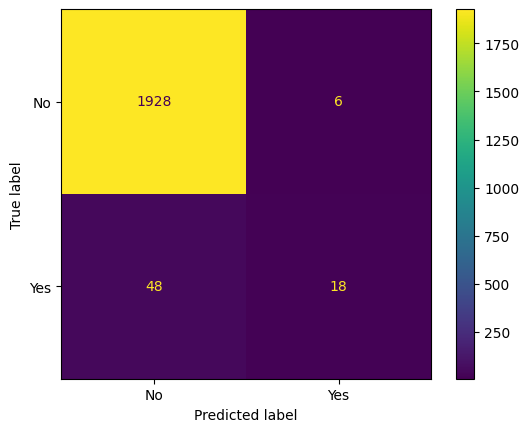

In [84]:
cm= confusion_matrix(y_test,y_hat)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()
plt.show()

Test accuracy:  0.9725


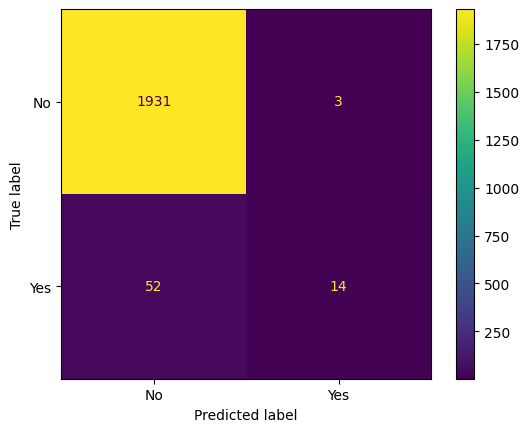

In [94]:
#create model
lda_model=LDA()
#train model
lda_model.fit(X_train,y_train)
#test model and make prediction
y_hat=lda_model.predict(X_test)
#display
print('Test accuracy: ', accuracy_score(y_test,y_hat))
cm= confusion_matrix(y_test,y_hat)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()
plt.show()

Test accuracy:  0.9715


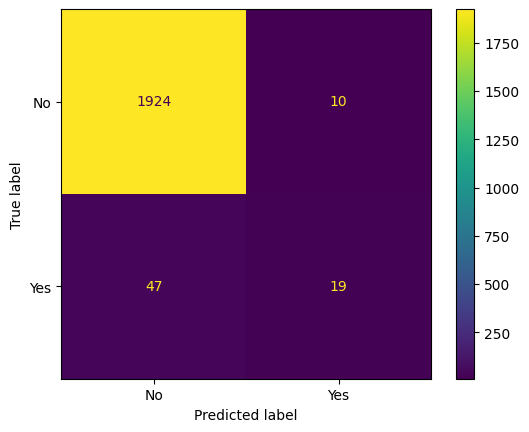

In [95]:
#create model
nb_model=NB()
#train model
nb_model.fit(X_train,y_train)
#test model and make prediction
y_hat=nb_model.predict(X_test)
#display
print('Test accuracy: ', accuracy_score(y_test,y_hat))
cm= confusion_matrix(y_test,y_hat)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()
plt.show()

Test accuracy:  0.9615


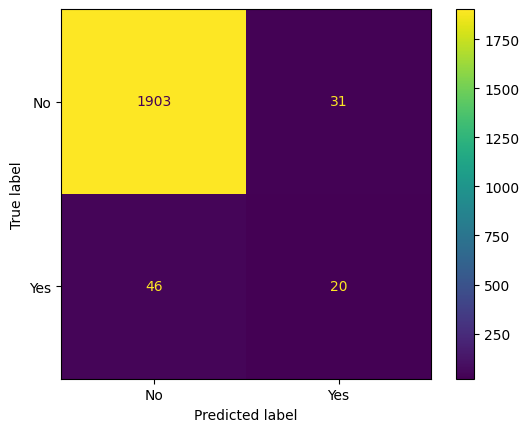

In [96]:
#create model
knn_model_1=KNN(n_neighbors=1)

#train model
knn_model_1.fit(X_train,y_train)
#test model and make prediction
y_hat=knn_model_1.predict(X_test)
#display
print('Test accuracy: ', accuracy_score(y_test,y_hat))
cm= confusion_matrix(y_test,y_hat)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()
plt.show()

Test accuracy:  0.9715


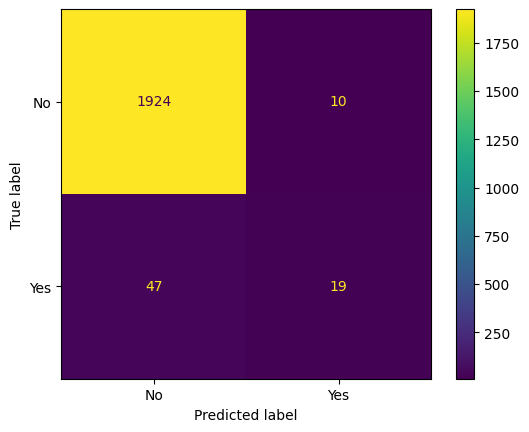

In [97]:
#create model
knn_model_2=KNN(n_neighbors=3)

#train model
knn_model_2.fit(X_train,y_train)
#test model and make prediction
y_hat=knn_model_2.predict(X_test)
#display
print('Test accuracy: ', accuracy_score(y_test,y_hat))
cm= confusion_matrix(y_test,y_hat)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot()
plt.show()

Test accuracy:  0.971


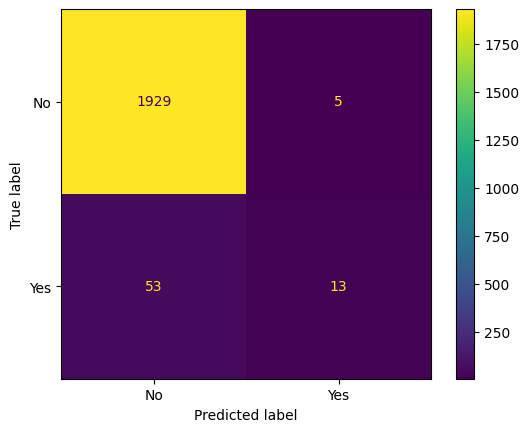

In [98]:
#create model
knn_model_3=KNN(n_neighbors=5)

#train model
knn_model_3.fit(X_train,y_train)
#test model and make prediction
y_hat=knn_model_3.predict(X_test)
#display
print('Test accuracy: ', accuracy_score(y_test,y_hat))
cm= confusion_matrix(y_test,y_hat)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()
plt.show()

1) I would use the LDA model as it has the highest accuracy and seems as though it is the least confused as it has the least (yes,no)(no,ye) ratio or incorrect predictions
2) The Model that was the most confused was the KNN model using only 1 neighbor as it is the least accurate sitting at roughtly 96% and a total of 77 incorrect predictions.